In [1]:
import pandas as pd
import numpy as np

In [ ]:
#Data Understanding

In [2]:
housing_data = pd.read_csv("Melbourne_housing_FULL.csv")
housing_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
housing_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [4]:
housing_cat = housing_data.select_dtypes(include=["object","category"])
print("Number of categorical features {0}".format(housing_cat.shape[1]))

Number of categorical features 8


In [5]:
housing_num = housing_data.select_dtypes(include=np.number)
print("Number of numeric features {0}".format(housing_num.shape[1]))

Number of numeric features 13


In [ ]:
#Data Cleanup / Preparation

In [6]:
#Check for duplicates
duplicates = housing_data.duplicated()
duplicates.value_counts()

False    34856
True         1
dtype: int64

In [7]:
print("No of rows in dataset before removing duplicates {0}".format(housing_data.shape[0]))

No of rows in dataset before removing duplicates 34857


In [8]:
housing_no_dup = housing_data.drop_duplicates()
print("No of rows in dataset after removing duplicates {0}".format(housing_no_dup.shape[0]))

No of rows in dataset after removing duplicates 34856


In [9]:
#check dtypes
housing_no_dup.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [10]:
#Date dtype is made into datetime. Some of the remaining object dtypes can be made categorical based on the problem
#Some of them have a lot of categories. Really need to understand the problem to decide the approach
housing_no_dup["Date"] = housing_no_dup["Date"].astype(np.datetime64)
housing_no_dup.dtypes

/home/play/ML/ml/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           float64
dtype: object

In [11]:
#Check for attributes with missing values
housing_no_dup.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
dtype: bool

In [12]:
#Missing Values for Price
housing_no_dup["Price"].isnull().value_counts().iloc[1]

7609

In [13]:
#Price is a continuous attribute
housing_no_dup["Price"].describe()


count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

In [14]:
#Imput missing values with median
housing_no_dup["Price"].fillna(8.700000e+05,inplace=True)


/home/play/ML/ml/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
#Missing Values for Distance
housing_no_dup["Distance"].isnull().value_counts().iloc[1]

1

In [16]:
housing_no_dup["Distance"].describe()

count    34855.000000
mean        11.184808
std          6.788952
min          0.000000
25%          6.400000
50%         10.300000
75%         14.000000
max         48.100000
Name: Distance, dtype: float64

In [17]:
#Check the price of this entry
housing_no_dup[housing_no_dup["Distance"].isnull()==True]["Price"]

29483    616000.0
Name: Price, dtype: float64

In [18]:
#Gut instinct says that the closer the house is to the CBD , the higher the price range. The price for this is closer to the median
#Impute the missing value with the median distance : This is an approx
housing_no_dup["Distance"].fillna(10.3, inplace=True)

In [19]:
#Check PostCode missing values
housing_no_dup["Postcode"].isnull().value_counts().iloc[1]

1

In [20]:
#Impute with most frequently occuring postcode
housing_no_dup["Postcode"].value_counts()

3073.0    844
3046.0    638
3020.0    617
3121.0    612
3165.0    583
         ... 
3139.0      1
3159.0      1
3793.0      1
3788.0      1
3428.0      1
Name: Postcode, Length: 211, dtype: int64

In [21]:
housing_no_dup["Postcode"].fillna(3073, inplace=True)

In [22]:
housing_no_dup["Bedroom2"].value_counts()

3.0     11880
4.0      6348
2.0      5777
5.0      1427
1.0       966
6.0       168
7.0        30
0.0        17
8.0        13
9.0         5
10.0        4
30.0        1
12.0        1
20.0        1
16.0        1
Name: Bedroom2, dtype: int64

In [23]:
housing_no_dup["Bedroom2"].isnull().value_counts().iloc[1]

8217

In [24]:
housing_no_dup["Bedroom2"].fillna(3,inplace=True)

In [25]:
housing_no_dup["Bathroom"].value_counts()

1.0     12969
2.0     11064
3.0      2180
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
9.0         1
12.0        1
Name: Bathroom, dtype: int64

In [26]:
housing_no_dup["Bathroom"].fillna(1,inplace=True)

In [27]:
housing_no_dup["Car"].value_counts()

2.0     12213
1.0      9164
0.0      1631
3.0      1606
4.0      1161
5.0       151
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
26.0        1
12.0        1
18.0        1
Name: Car, dtype: int64

In [28]:
housing_no_dup["Car"].fillna(2,inplace=True)

In [29]:
housing_no_dup["Landsize"].describe()

count     23046.000000
mean        593.607177
std        3398.915462
min           0.000000
25%         224.000000
50%         521.000000
75%         670.000000
max      433014.000000
Name: Landsize, dtype: float64

In [30]:
housing_no_dup["Landsize"].fillna(521,inplace=True)

In [31]:
housing_no_dup["BuildingArea"].describe()

count    13741.000000
mean       160.251616
std        401.281270
min          0.000000
25%        102.000000
50%        136.000000
75%        188.000000
max      44515.000000
Name: BuildingArea, dtype: float64

In [32]:
housing_no_dup["BuildingArea"].fillna(136,inplace=True)

In [33]:
housing_no_dup["YearBuilt"].value_counts()

1970.0    1490
1960.0    1260
1950.0    1089
1980.0     726
1900.0     606
          ... 
1868.0       1
1883.0       1
1196.0       1
1855.0       1
1830.0       1
Name: YearBuilt, Length: 160, dtype: int64

In [34]:
housing_no_dup["YearBuilt"].isnull().value_counts()

True     19306
False    15550
Name: YearBuilt, dtype: int64

In [35]:
housing_no_dup["YearBuilt"].fillna(1970,inplace=True)

In [36]:
housing_no_dup["CouncilArea"].isnull().value_counts()

False    34853
True         3
Name: CouncilArea, dtype: int64

In [37]:
housing_no_dup["CouncilArea"].value_counts()

Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1045
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston City Council   

In [38]:
housing_no_dup["CouncilArea"].fillna("Boroondara City Council",inplace=True)

In [39]:
housing_no_dup["Lattitude"].isnull().value_counts()

False    26880
True      7976
Name: Lattitude, dtype: int64

In [40]:
housing_no_dup["Lattitude"].describe()

count    26880.000000
mean       -37.810634
std          0.090281
min        -38.190430
25%        -37.862950
50%        -37.807600
75%        -37.754092
max        -37.390200
Name: Lattitude, dtype: float64

In [41]:
housing_no_dup["Lattitude"].fillna(-37.807600,inplace=True)

In [42]:
housing_no_dup["Longtitude"].isnull().value_counts()

False    26880
True      7976
Name: Longtitude, dtype: int64

In [43]:
housing_no_dup["Longtitude"].describe()

count    26880.000000
mean       145.001845
std          0.120167
min        144.423790
25%        144.933500
50%        145.007800
75%        145.071900
max        145.526350
Name: Longtitude, dtype: float64

In [44]:
housing_no_dup["Longtitude"].fillna(145.007800,inplace=True)

In [45]:
housing_no_dup["Regionname"].isnull().value_counts()

False    34853
True         3
Name: Regionname, dtype: int64

In [46]:
housing_no_dup["Regionname"].value_counts()

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4376
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64

In [47]:
housing_no_dup["Regionname"].fillna("Southern Metropolitan", inplace=True)

In [48]:
housing_no_dup["Propertycount"].value_counts()

21650.0    844
8870.0     722
10969.0    583
14949.0    552
10412.0    491
          ... 
5462.0       1
129.0        1
335.0        1
1240.0       1
271.0        1
Name: Propertycount, Length: 342, dtype: int64

In [49]:
housing_no_dup["Propertycount"].isnull().value_counts()

False    34853
True         3
Name: Propertycount, dtype: int64

In [50]:
housing_no_dup[housing_no_dup["Propertycount"].isnull()==True]["Suburb"]

18523      Footscray
26888     Camberwell
29483    Fawkner Lot
Name: Suburb, dtype: object

In [51]:
housing_no_dup[housing_no_dup["Suburb"]=="Footscray"]["Propertycount"].value_counts()

7570.0    262
Name: Propertycount, dtype: int64

In [52]:
housing_no_dup[housing_no_dup["Suburb"]=="Camberwell"]["Propertycount"].value_counts()

8920.0    422
Name: Propertycount, dtype: int64

In [53]:
housing_no_dup[housing_no_dup["Suburb"]=="Fawkner Lot"]["Propertycount"].value_counts()

Series([], Name: Propertycount, dtype: int64)

In [54]:
housing_no_dup.iloc[18522,-1] = 7570

/home/play/ML/ml/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [55]:
housing_no_dup.iloc[26887,-1] = 8920

In [56]:
housing_no_dup.iloc[29482,-1] = 1

In [57]:
housing_no_dup["Propertycount"].isnull().value_counts()

False    34856
Name: Propertycount, dtype: int64

In [58]:
housing_no_dup.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [59]:
numeric_df = housing_no_dup.select_dtypes(include=np.number)
numeric_df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,870000.0,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,-37.8014,144.9958,4019.0
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,3,870000.0,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,-37.8114,145.0116,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


In [60]:
import seaborn as sns

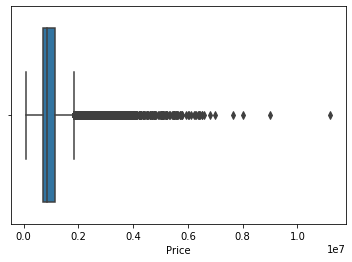

In [61]:
sns.boxplot(housing_no_dup["Price"])

In [62]:
price_q1 = housing_no_dup["Price"].quantile(0.25)
price_q3 = housing_no_dup["Price"].quantile(0.75)
price_IQR = price_q3 - price_q1
print(f"Price Q1 {price_q1}")
print(f"Price Q3 {price_q3}")
print(f"Price IQR {price_IQR}")
price_low_whisker = price_q1 - 1.5*price_IQR
price_high_whisker = price_q3 + 1.5*price_IQR
print(f"Price Low Whisker {price_low_whisker}")
print(f"Price High Whisker {price_high_whisker}")

Price Q1 695000.0
Price Q3 1150000.0
Price IQR 455000.0
Price Low Whisker 12500.0
Price High Whisker 1832500.0


In [63]:
#Floor/Cap Price Values
housing_no_dup.loc[(housing_no_dup["Price"]<price_low_whisker),"Price"] = price_low_whisker
housing_no_dup.loc[(housing_no_dup["Price"]>price_high_whisker),"Price"] = price_high_whisker


/home/play/ML/ml/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


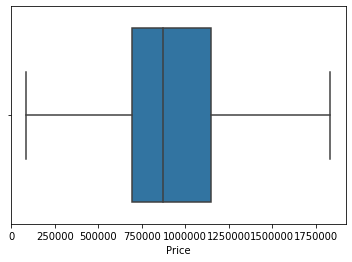

In [64]:
sns.boxplot(housing_no_dup["Price"])

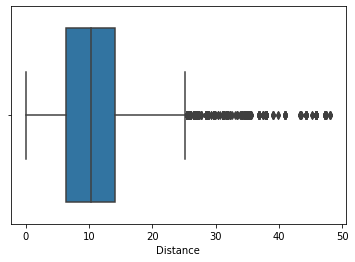

In [65]:
sns.boxplot(housing_no_dup["Distance"])

In [66]:
dist_q1 = housing_no_dup["Distance"].quantile(0.25)
dist_q3 = housing_no_dup["Distance"].quantile(0.75)
dist_IQR = dist_q3 - dist_q1
print(f"Distance Q1 {dist_q1}")
print(f"Distance Q3 {dist_q3}")
print(f"Distance IQR {dist_IQR}")
dist_low_whisker = dist_q1 - 1.5*dist_IQR
dist_high_whisker = dist_q3 + 1.5*dist_IQR
print(f"Distance Low Whisker {dist_low_whisker}")
print(f"Distance High Whisker {dist_high_whisker}")

Distance Q1 6.4
Distance Q3 14.0
Distance IQR 7.6
Distance Low Whisker -4.999999999999998
Distance High Whisker 25.4


In [67]:
housing_no_dup.loc[(housing_no_dup["Distance"]>dist_high_whisker),"Distance"] = dist_high_whisker

/home/play/ML/ml/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


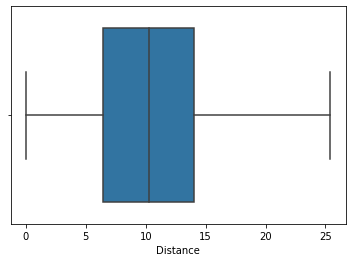

In [68]:
sns.boxplot(housing_no_dup["Distance"])

In [ ]:
#Feature Engineering

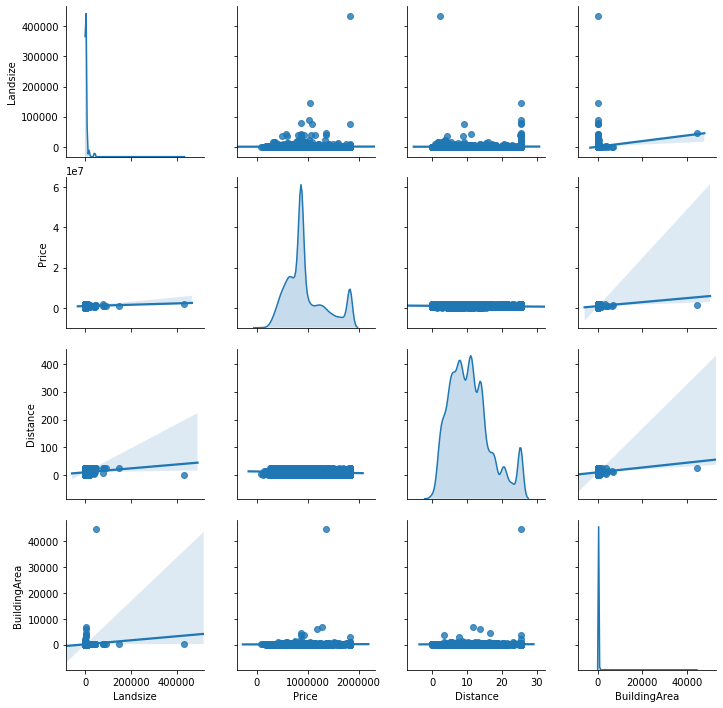

In [71]:
sns.pairplot(housing_no_dup, 
             vars=["Landsize", "Price", "Distance", "BuildingArea"], 
             diag_kind="kde",
             kind = "reg")

In [81]:
#Based on the above plots we can predict that the Price, Distance , Area and Size variables needs to be transformed 
#to extract some pattern. Use log to create a new feature
housing_no_dup["LogPrice"] = housing_no_dup["Price"].apply(np.log)
housing_no_dup["LogLandsize"] = housing_no_dup["Landsize"].apply(lambda x : np.log(x) if x > 0 else x)
housing_no_dup["LogDistance"] = housing_no_dup["Distance"].apply(lambda x : np.log(x) if x > 0 else x)
housing_no_dup["LogBuildingArea"] = housing_no_dup["BuildingArea"].apply(lambda x : np.log(x) if x > 0 else x)

/home/play/ML/ml/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/play/ML/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/play/ML/ml/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

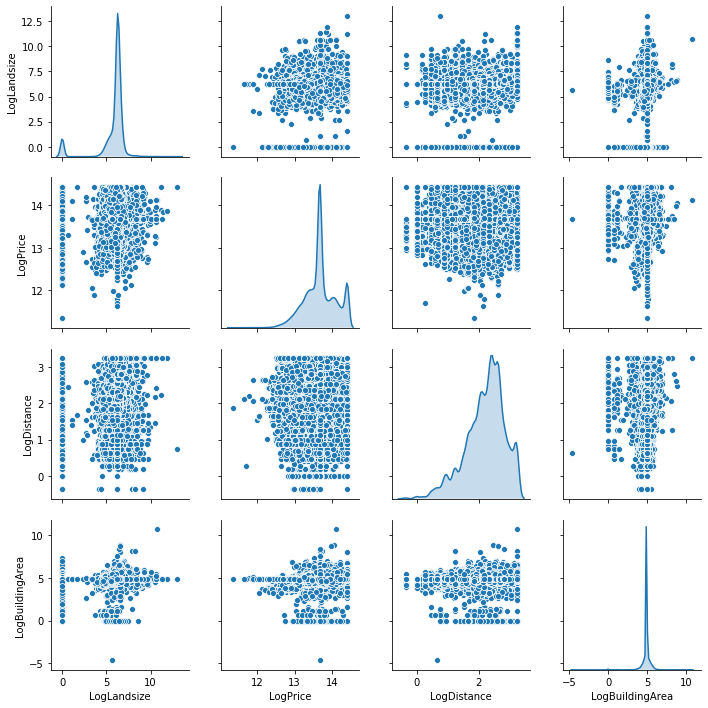

In [82]:
sns.pairplot(housing_no_dup, 
             vars=["LogLandsize", "LogPrice", "LogDistance", "LogBuildingArea"], 
             diag_kind="kde")

In [83]:
housing_no_dup.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,LogPrice,LogDistance,LogLandsize,LogBuildingArea
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,2016-03-09,2.5,3067.0,...,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,13.676248,0.916291,4.836282,4.912655
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,14.207553,0.916291,5.308268,4.912655
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,13.849912,0.916291,5.049856,4.369448
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,2016-04-02,2.5,3067.0,...,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,13.676248,0.916291,0.000000,4.912655
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,14.197366,0.916291,4.897840,5.010635


In [88]:
columns = ["Suburb","CouncilArea", "Regionname", "Rooms","Type","Method","LogPrice",
           "LogDistance","LogLandsize","LogBuildingArea",
           "Bathroom","Bedroom2"]
housing_interest_df = housing_no_dup.loc[:,columns] 
housing_interest_df.head()

,Suburb,CouncilArea,Regionname,Rooms,Type,Method,LogPrice,LogDistance,LogLandsize,LogBuildingArea,Bathroom,Bedroom2
0,Abbotsford,Yarra City Council,Northern Metropolitan,2,h,SS,13.676248,0.916291,4.836282,4.912655,1.0,2.0
1,Abbotsford,Yarra City Council,Northern Metropolitan,2,h,S,14.207553,0.916291,5.308268,4.912655,1.0,2.0
2,Abbotsford,Yarra City Council,Northern Metropolitan,2,h,S,13.849912,0.916291,5.049856,4.369448,1.0,2.0
3,Abbotsford,Yarra City Council,Northern Metropolitan,3,u,VB,13.676248,0.916291,0.000000,4.912655,2.0,3.0
4,Abbotsford,Yarra City Council,Northern Metropolitan,3,h,SP,14.197366,0.916291,4.897840,5.010635,2.0,3.0


In [ ]:
#The housing_interest_df probably has enough variables to have a prediction of price using regression.
#Bringing the essential continuous variables into the log scale has made them more or less in the same dimensions
#This would imply the need for further standardization / normalization is not high. 